# 第二章 基础二维图
## 2.6 饼图

In [13]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
import matplotlib.pyplot as plt
# 新增
from matplotlib.transforms import Bbox
import os

## 读取数据

In [2]:
filename_ventfield='data/VentFields/vent_fields_all.csv'
result=pd.read_csv(filename_ventfield)
result=result.fillna(-999)
print(result.keys())
ID=np.array(result['Node ID'])


Index(['Name ID', 'Name Alias(es)', 'MGDS_FeatureID lowest in hierarchy',
       'Vent Sites', 'Activity', 'Maximum Temperature',
       'Max Temperature Category', 'Latitude', 'Longitude', 'Ocean', 'Region',
       'National Jurisdiction', 'Maximum or Single Reported Depth',
       'Minimum Depth', 'Tectonic setting', 'Full Spreading Rate (mm/a)',
       'Host Rock', 'Deposit Type', 'Notes on Vent Field Description',
       'Notes Relevant to Biology',
       'Year and How Discovered (if active, visual confirmation is listed first)',
       'Discovery References (text)', 'Other References (text)',
       'Volcano Number', 'Node ID'],
      dtype='object')


## 基本饼图

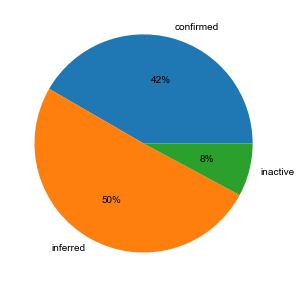

In [3]:
# 获取Activity的分类数据
Activity=result['Activity']
Activity_unique=np.unique(Activity)
labels=[]
sizes=[]
for activity in Activity_unique:
    labels.append(activity.split(' ')[-1])
    sizes.append(len(Activity[Activity==activity]))

# 画图
fig=plt.figure(figsize=(4,4))
ax=plt.gca()

# 绘制饼图
ax.pie(sizes,labels=labels,autopct='%.0f%%')

# savefig
plt.tight_layout(pad=0)
figname='../../figures/Chapter2/Lecture2_6_basic_1.pdf'
plt.savefig(figname,bbox_inches='tight')
os.system('pdfcrop '+figname+' '+figname)
plt.show()

## 饼图+图例

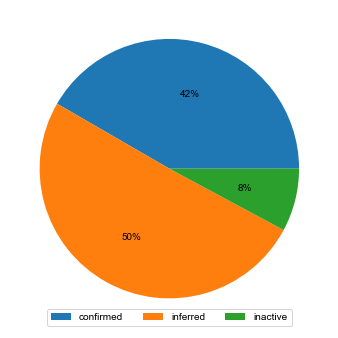

In [4]:
# 画图
fig=plt.figure(figsize=(4,4))
ax=plt.gca()

# 绘制饼图
wedges,texts, autotexts=ax.pie(sizes,autopct='%.0f%%')
ax.legend(handles=wedges,labels=labels, ncol=3, loc='lower center')
# savefig
plt.tight_layout(pad=0,rect=[-0.1,-0.1,1.1,1.2])
figname='../../figures/Chapter2/Lecture2_6_basic_2.pdf'
plt.savefig(figname,bbox_inches='tight')
os.system('pdfcrop '+figname+' '+figname)
plt.show()

## 饼图属性设置及文字定制

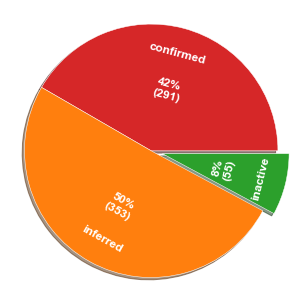

In [5]:
def func(pct, allvalues):
    absolute = int(pct/100.*allvalues)
    return "{:.0f}%\n({:d})".format(pct, absolute)

fig=plt.figure(figsize=(4,4))
ax=plt.gca()

# 绘制饼图
explode=(0.,0,0.1)
colors=['#d62728','#ff7f0e','#2ca02c']
wedgeprops={'linewidth':1}
textprops={'color':'w','fontsize': 12,'fontweight':'bold'}
wedges, texts, autotexts=ax.pie(sizes,labels=labels,labeldistance=0.8,explode=explode, startangle=0, shadow=True, autopct=lambda pct: func(pct, np.sum(sizes)),
       colors=colors,pctdistance=0.5,wedgeprops=wedgeprops,textprops=textprops ,radius=1.1)

for wedge, text, autotext in zip(wedges, texts,autotexts):
    theta=(wedge.theta1+wedge.theta2)/2
    rotation=theta-90 if theta<=180 else theta-90-180
    plt.setp(wedge,ec='w', lw=0.5)
    plt.setp(text,rotation=rotation,ha='center',va='center', fontsize=12, fontweight='bold')
    plt.setp(autotext,rotation=rotation,ha='center',va='center', fontsize=12, fontweight='bold')
# savefig
plt.tight_layout(pad=0)
figname='../../figures/Chapter2/Lecture2_6_basic_3.pdf'
plt.savefig(figname,bbox_inches='tight')
os.system('pdfcrop '+figname+' '+figname)
plt.show()

## 嵌套饼图

### 提取数据
**目标**： 从全球热液喷口分布的数据中提取其中位于洋中脊上的部分。（1）按洋中脊的扩张速率分类；（2）按喷口温度的高低和活动性分类

In [6]:
# 经纬度坐标
lon=np.array(result['Longitude'],dtype=float)
lat=np.array(result['Latitude'],dtype=float)
# --------------------- 洋中脊 ------------------------------------------------
Tectonic=np.array(result['Tectonic setting'],str)
ind_MOR=(Tectonic=='mid-ocean ridge')

# ------------------ 洋中脊扩张速率 ---------------------------------------------
SpreadingRate=result['Full Spreading Rate (mm/a)'].values
ind_rate=SpreadingRate!=-999
ind_ulslow= (SpreadingRate>0) & (SpreadingRate<=20)
ind_slow= (SpreadingRate>20) & (SpreadingRate<=50)
ind_medi=(SpreadingRate>50) & (SpreadingRate<=80)
ind_fast=(SpreadingRate>80) & (SpreadingRate<=120)
ind_ulfast=(SpreadingRate>120)
ind_rate_ridge=ind_MOR & ind_rate
# ------------------ 热液喷口温度 ---------------------------------------------
T=result['Maximum Temperature'].values
T_cat=np.array(result['Max Temperature Category'])
# 1.1. lon_lat_highT
ind_highT=((T>=300) | (T_cat == 'High'))
# 1.2. low temperature
ind_lowT=((T<300) & (T>0) | (T_cat == 'Low'))
# 1.3. inactive
ind_inactive=~(ind_highT | ind_lowT)
# --------------汇总数据-------------
num_SpreadingRate=[len(lon[ind_ulslow & ind_rate_ridge]),
                  len(lon[ind_slow & ind_rate_ridge]),
                  len(lon[ind_medi & ind_rate_ridge]),
                  len(lon[ind_fast & ind_rate_ridge]),
                  len(lon[ind_ulfast & ind_rate_ridge])]
label_SpreadingRate=['Ultra-slow','Slow','Medium','Fast','Super fast']
num_MOR_T=[len(lon[ind_highT & ind_MOR]),
                  len(lon[ind_lowT & ind_MOR]),
                  len(lon[ind_inactive & ind_MOR])]
label_MOR_T=['High T','Low T', 'Inactive']
# print(num_SpreadingRate, label_SpreadingRate)
# print(num_MOR_T, label_MOR_T)

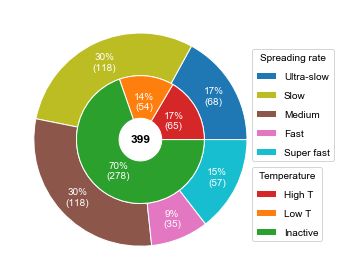

In [12]:
figsize=(5,4)
fig=plt.figure(figsize=figsize)
ax=plt.gca()

radius=1
thick=0.4
colors1=['#1f77b4','#bcbd22','#8c564b','#e377c2','#17becf']
colors2=['#d62728','#ff7f0e','#2ca02c']
wedgeprops=dict(width=thick, ec='w')
# 绘制饼图
wedges1, labels1, pcts1=ax.pie(num_SpreadingRate,radius=radius, wedgeprops=wedgeprops,colors=colors1, 
               autopct=lambda pct: func(pct, np.sum(num_SpreadingRate)), pctdistance=radius-thick/2)
wedges2, labels2, pcts2=ax.pie(num_MOR_T,radius=radius-thick, wedgeprops=wedgeprops,colors=colors2,
              autopct=lambda pct: func(pct, np.sum(num_MOR_T)), pctdistance=radius-thick)
# text props
plt.setp(pcts1, color='w')
plt.setp(pcts2, color='w')
ax.text(0,0,str('%.0f'% (np.sum(num_MOR_T))),va='center',ha='center', fontweight='bold', fontsize=12)
# legend
x_leg=0.9
leg1=ax.legend(handles=wedges1, labels=label_SpreadingRate, title='Spreading rate', labelspacing=1,
               loc='lower left', bbox_to_anchor=(x_leg,0.4))
ax.add_artist(leg1)
leg2=ax.legend(handles=wedges2, labels=label_MOR_T, title='Temperature',labelspacing=1,
               loc='lower left', bbox_to_anchor=(x_leg,0.1))

# savefig
plt.tight_layout()
bbox = Bbox(np.array([[0.5,0.5],[figsize[0]+0.3,figsize[1]-0.5]]))
figname='../../figures/Chapter2/Lecture2_6_case1.pdf'
plt.savefig(figname,bbox_inches='tight')
os.system('pdfcrop '+figname+' '+figname)
plt.show()

In [16]:
print(num_SpreadingRate)
print(label_SpreadingRate)
print(num_MOR_T)
print(label_MOR_T)

[68, 119, 119, 35, 58]
['Ultra-slow', 'Slow', 'Medium', 'Fast', 'Super fast']
[66, 55, 278]
['High T', 'Low T', 'Inactive']
